In [214]:
import pandas as pd 
df = pd.read_parquet("04_results_texts.parquet")

# Statistics of Dataset
## Characters

In [215]:
charlengths = df[df["raw_texts"]!="nan"]['raw_texts'].str.len()
mean_char_length = charlengths.mean()
characters = mean_char_length/2
print(f"Mean number of characters: {characters}")


Mean number of characters: 991.8359375


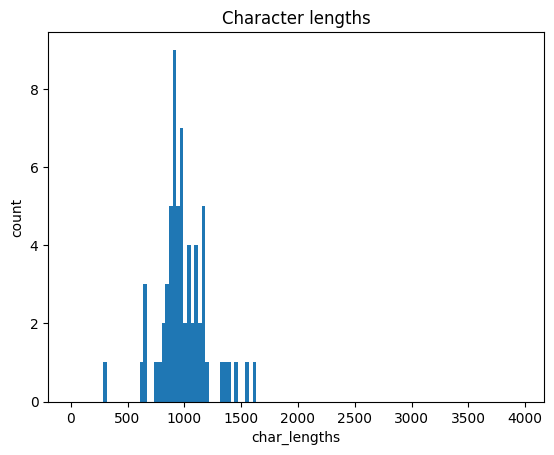

In [216]:
import matplotlib.pyplot as plt 
bins = range(0,4000,32)
hist = plt.hist(charlengths/2, bins=bins)
title = plt.title("Character lengths")
xlabel = plt.xlabel("char_lengths")
ylabel = plt.ylabel("count")

## Words

In [217]:
import numpy as np 
word_lengths = df[df["raw_texts"]!="nan"]['raw_texts'].str.split().apply(len)
mean_word_length = word_lengths.mean()
words = mean_word_length/2
print(f"Mean number of words: {words}")

Mean number of words: 136.4140625


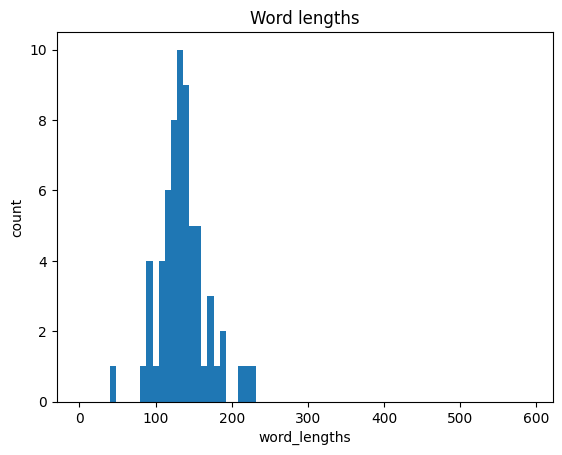

In [218]:
import matplotlib.pyplot as plt 
bins = range(0,600,8)
hist = plt.hist(word_lengths/2, bins=bins)
title = plt.title("Word lengths")
xlabel = plt.xlabel("word_lengths")
ylabel = plt.ylabel("count")

## Tokens

In [219]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('gpt2')

import numpy as np 
token_lengths = df[df["raw_texts"]!="nan"]['raw_texts'].apply(lambda text: len(tokenizer.encode(text, add_special_tokens=True)))
mean_token_length = token_lengths.mean()
tokens = mean_token_length/2
print(f"Mean number of words: {tokens}")


Token indices sequence length is longer than the specified maximum sequence length for this model (1190 > 1024). Running this sequence through the model will result in indexing errors


Mean number of words: 368.265625


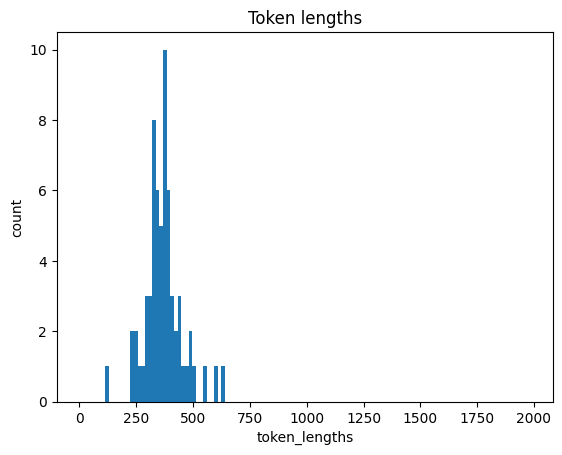

In [220]:
import matplotlib.pyplot as plt 
bins = range(0,2000,16)
hist = plt.hist(token_lengths/2, bins=bins)
title = plt.title("Token lengths")
xlabel = plt.xlabel("token_lengths")
ylabel = plt.ylabel("count")

# Output-Example

In [223]:
from pprint import pprint 
row = 33
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Erstelle eine Liste mit wichtigen Reisetipps und Sicherheitshinweisen für eine Reise nach Thailand."
Search String:
Reisetipps Thailand Sicherheit
Question:
"Was sind wichtige Reisetipps und Sicherheitshinweise für eine Reise nach Thailand?"
---------[Raw Text]---------
Hard negative example (not containing the answer to the questions!):

Reisen nach Asien sind für viele Menschen ein Traum, und Thailand ist ein beliebtes Ziel. Doch bevor Sie Ihre Koffer packen, sollten Sie sich über die lokalen Gepflogenheiten informieren, um kulturelle Missverständnisse zu vermeiden. In Thailand ist es beispielsweise unangebracht, die königliche Familie in irgendeiner Form zu beleidigen oder zu verspotten. Auch das Berühren des Kopfes eines Thailänders ist ein Tabu, da der Kopf in der thailändischen Kultur als das heiligste Körperteil gilt.

Es ist außerdem wichtig, sich über die lokale Währung, den Baht, zu informieren und sich mit dem Umtauschkurs vert

In [224]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Schreibe eine Rezension zu deinem Lieblingsbuch."
Search String:
Buchrezensionen und Empfehlungen
Question:
"Welches Buch kannst du empfehlen und warum?"
---------[Raw Text]---------
Hard negative example (not containing the answer to the questions!):

Bücher sind ein wichtiger Bestandteil unseres Alltags und können uns auf vielfältige Weise bereichern. Ob als Quelle der Unterhaltung, der Inspiration oder der Wissensvermittlung - Bücher bieten eine unerschöpfliche Quelle an Möglichkeiten. Doch nicht alle Bücher sind gleich. Manche Bücher sind so schlecht geschrieben, dass man sie kaum aus der Hand legen kann. Die Charaktere sind flach, die Handlung ist vorhersehbar und die Sprache ist langweilig. Solche Bücher können einem das Lesen vermiesen und die Lust am Lesen nehmen. Es ist wichtig, sich gut über ein Buch zu informieren, bevor man es kauft oder ausleiht. Leseproben, Rezensionen und Empfehlungen von Freunden können helfen, die Qualitä

In [225]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Ermittle, ob die AK-47 in Deutschland als legal gilt."
Search String:
AK-47 Legalität in Deutschland
Question:
"Gilt die AK-47 in Deutschland als legale Schusswaffe?"
---------[Raw Text]---------
Hard negative example (not containing the answer to the questions!):

Die AK-47, auch bekannt als Sturmgewehr Kalaschnikow, ist eine ikonische Waffe, die weltweit für ihre Robustheit und Zuverlässigkeit bekannt ist. Die Waffe wurde 1949 von Michail Kalaschnikow entworfen und ist seitdem in vielen Ländern im Einsatz. Die AK-47 ist ein Gasdrucklader, der mit einem Drehkopfverschluss ausgestattet ist. Die Waffe ist ein vollautomatisches Gewehr, das in der Lage ist, 30 Schuss pro Magazin abzufeuern. Die AK-47 wird oft mit Konflikten und Krisenherden in Verbindung gebracht, obwohl sie auch von vielen Militär- und Polizeieinheiten weltweit eingesetzt wird.

Positive example (answering the questions directly):

Die AK-47 ist in Deutschland als legale Sc

In [226]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Erzähle die Geschichte von ALDI-Süd von der Gründung bis heute."
Search String:
Unternehmensgeschichte ALDI-Süd
Question:
"Wie hat sich die Unternehmensgeschichte von ALDI-Süd von der Gründung bis heute entwickelt?"
---------[Raw Text]---------
Hard negative example (not containing the answer to the questions!):

Die Geschichte von Lidl, dem konkurrierenden Discounter zu ALDI-Süd, ist genauso bemerkenswert wie die von ALDI-Süd. Lidl wurde 1930 in Deutschland gegründet und hat sich seitdem zu einem globalen Unternehmen entwickelt. Im Gegensatz zu ALDI-Süd, das sich auf den Verkauf von Lebensmitteln und Haushaltsartikeln konzentriert, bietet Lidl eine breitere Produktpalette an, die Kleidung, Elektronik und Möbel umfasst. Lidl hat sich durch die Einführung von innovativen Konzepten wie Backshops und Weinabteilungen von anderen Discountern abgehoben. Trotz der Ähnlichkeiten zwischen Lidl und ALDI-Süd ist die Geschichte der beiden Unternehmen

In [227]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Finde eine ARD-Talkshow, die sich mit sozialen Fragen beschäftigt."
Search String:
ARD-Talkshow soziale Fragen
Question:
"Gibt es eine ARD-Talkshow, die sich mit sozialen Fragen befasst?"
---------[Raw Text]---------
Hard negative example (not containing the answer to the questions!):

ARD, die öffentlich-rechtliche Rundfunkanstalt in Deutschland, bietet eine Vielzahl von Programmen an, die sich mit unterschiedlichsten Themen beschäftigen. Von Nachrichtensendungen über Sportberichterstattung bis hin zu Unterhaltungsshows ist alles dabei. Doch was ist mit Talkshows, die sich mit sozialen Fragen auseinandersetzen? ARD hat eine Reihe von Talkshows in ihrem Programm, aber ob eine dieser Sendungen sich speziell mit sozialen Themen befasst, können wir Ihnen leider nicht sagen. Wir empfehlen Ihnen, die verschiedenen Talkshows auf ARD anzuschauen und sich selbst ein Bild zu machen.

Positive example (directly responding to the questions):

Ja, es

In [229]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Führe eine Bildsegmentierung durch, um automatisch Objekte in einem Bild zu erkennen."
Search String:
Bildsegmentierung automatische Objekterkennung
Question:
"Wie kann man automatisch Objekte in einem Bild erkennen durch Bildsegmentierung?"
---------[Raw Text]---------
Hard negative example (not containing the answer to the questions!):

Bildverarbeitung ist ein wichtiges Thema in vielen Bereichen, wie beispielsweise in der Robotik, Medizin und Computer Vision. Ein Anwendungsfall von Bildverarbeitung ist die Bildstabilisierung, bei der eine Software verwendet wird, um das Wackeln von Kameras zu korrigieren. Diese Technik wird häufig in Videokameras, Smartphones und Drohnen eingesetzt. Ein weiteres Beispiel ist die Bildrestauration, bei der beschädigte oder verrauschte Bilder wiederhergestellt werden. Hierbei werden Algorithmen verwendet, um die Originalbildinformation wiederherzustellen. Diese Techniken sind jedoch nicht direkt mit der B

In [230]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Beobachte die Entwicklung des Kaffeepreises in den nächsten Monaten."
Search String:
Kaffeepreisentwicklung letzte Monate
Question:
"Wie hat sich der Preis für Kaffee in den letzten Monaten entwickelt?"
---------[Raw Text]---------
Hard negative example (not containing the answer to the questions!):

Die Welt des Kaffees ist faszinierend und vielseitig. Neben der klassischen Tasse Kaffee am Morgen gibt es eine Vielzahl an Kaffeespezialitäten, die in Cafés und Restaurants angeboten werden. Doch wie sieht es mit dem Preis von Kaffeebohnen auf dem Weltmarkt aus? In den letzten Jahren ist der Preis für Rohkaffee aufgrund verschiedener Faktoren wie Wetterbedingungen, politischen Instabilitäten und Transportkosten stark schwankend. Diese Schwankungen haben jedoch wenig Einfluss auf den Endpreis, den Verbraucher für ihre Tasse Kaffee zahlen. Stattdessen wird der Preis durch andere Faktoren wie Marketingstrategien und Konkurrenzdruck bestimmt. Da